# Week5 workshop of COS30049
## Data Pre-process 

#### Designed by Changzhou(K1sna) Han 

### Revise Lecture Content - (40 mins)

### Question1: Data Transformation - (40 mins)

Import necessary libraries: 
- Pandas for data manipulation and analysis
- Datetime for handling date and time

In [1]:
import pandas as pd
from datetime import datetime 

We create a simple dataset to understand the process of data transformation and get to use the functions of python.

In [2]:
# Create sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],  # Names of individuals
    'Birthdate': ['1990-01-01', '1985-05-15', '1992-07-20', '1990-01-01', '1985-05-15'],  # Birthdates
    'Gender': ['F', 'M', 'M', 'F', 'M']  # Genders
}

We can transfer the original data into pd form and print it.

In [3]:
# Convert the data to a DataFrame
df = pd.DataFrame(data)  # Creating a DataFrame from the dictionary

# Print the original data
print("Original DataFrame:")  # Print statement for clarity
print(df)  # Display the original DataFrame

Original DataFrame:
      Name   Birthdate Gender
0    Alice  1990-01-01      F
1      Bob  1985-05-15      M
2  Charlie  1992-07-20      M
3    Alice  1990-01-01      F
4      Bob  1985-05-15      M


Good job! Now we know the structure of this simple data, and we wanna to process it. 

As a start, we can try to rename the column with function "df.rename()" which is defined in the python package "pandas". 

In [4]:
# Rename a column
df.rename(columns={'Birthdate': 'DateOfBirth'}, inplace=True)  # Renaming the 'Birthdate' column to 'DateOfBirth'

print("Renamed DataFrame:")
print(df)

Renamed DataFrame:
      Name DateOfBirth Gender
0    Alice  1990-01-01      F
1      Bob  1985-05-15      M
2  Charlie  1992-07-20      M
3    Alice  1990-01-01      F
4      Bob  1985-05-15      M


And from the original data, we can notice that there are some duplicate rows, which need us to remove.

I recommend the function called "drop_duplicates" from pandas to drop duplicate rows of data.

In [5]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)  # Removing duplicate rows from the DataFrame

print("Removed duplicate DataFrame:") 
print(df) 

Removed duplicate DataFrame:
      Name DateOfBirth Gender
0    Alice  1990-01-01      F
1      Bob  1985-05-15      M
2  Charlie  1992-07-20      M


Great job, let's continue with some more complex data processing tasks!

As we can see, there is a column named "Date of Birth" in the data. However, this data is not very conducive to being read and processed by ML models. The model may not have a strong ability to differentiate between years and months, so we need to perform some data transformation to better reflect the characteristics of this data.

Therefore, I think it is reasonable to convert the "Date of Birth" into "Age". We can use Python libraries like `datetime` to help us with this transformation.

In [6]:
# Function to calculate age from birthdate
def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, '%Y-%m-%d')  # Convert string to datetime object
    today = datetime.today()  # Get today's date
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))  # Calculate age
    return age

# Apply the age calculation function to the 'DateOfBirth' column
df['Age'] = df['DateOfBirth'].apply(calculate_age)  # Adding a new column 'Age' by applying the calculate_age function

# Drop the 'DateOfBirth' column
df.drop(columns=['DateOfBirth'], inplace=True)  # Removing the 'DateOfBirth' column as it's no longer needed

# Print the processed data
print("\nProcessed DataFrame:")  # Print statement for clarity
print(df)  # Display the processed DataFrame


Processed DataFrame:
      Name Gender  Age
0    Alice      F   34
1      Bob      M   39
2  Charlie      M   32


### Question2: Data Visualization - (30 mins)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

 - Load the California Housing dataset 
 - Convert to DataFrame format for easier processing and viewing

In [8]:
california = datasets.fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

 - Plot a scatter plot of average rooms vs. house price

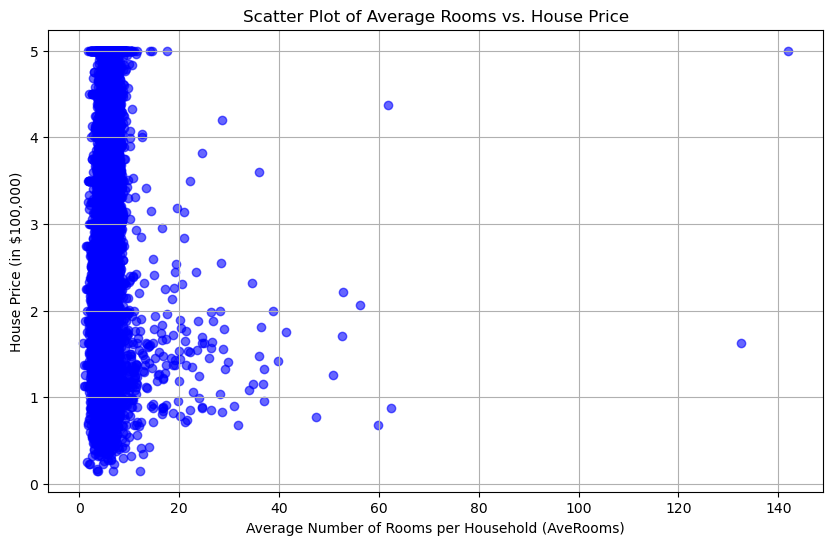

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(california_df['AveRooms'], california_df['PRICE'], alpha=0.6, color='b')
plt.title('Scatter Plot of Average Rooms vs. House Price')
plt.xlabel('Average Number of Rooms per Household (AveRooms)')
plt.ylabel('House Price (in $100,000)')
plt.grid(True)
plt.show()

 - Plot a correlation matrix heatmap

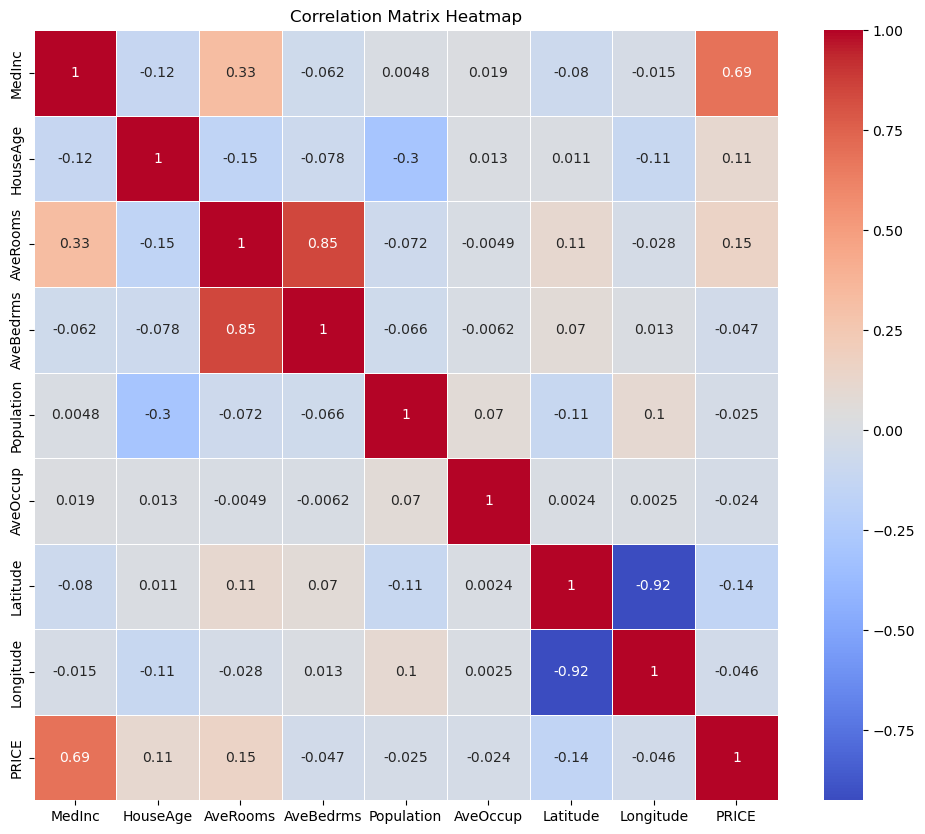

In [10]:
plt.figure(figsize=(12, 10))
corr_matrix = california_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Question3: Data Splitting - (20 mins)

Import necessary libraries: 
- train_test_split for split datasets

In [11]:
from sklearn.model_selection import train_test_split

Extract features and target variable

In [12]:
X = california_df.drop('PRICE', axis=1)  # Features
y = california_df['PRICE']  # Target variable

First split: Training + Validation and Test sets

In [13]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Second split: Training and Validation sets

In [14]:

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Note: 0.25 x 0.8 = 0.2, so the validation set is 20% of the original dataset

Output the sizes of the resulting datasets

In [15]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 12384 samples
Validation set size: 4128 samples
Test set size: 4128 samples
